In [1]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

def load_image(image_path):
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"이미지 파일을 찾을 수 없습니다: {image_path}")

    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"이미지 로드에 실패했습니다: {image_path}")

    return image

def detect_damage_akaze(original_path, damaged_path, threshold=0.7):
    try:
        original = load_image(original_path)
        damaged = load_image(damaged_path)
    except (FileNotFoundError, ValueError) as e:
        print(f"오류: {e}")
        return None, None

    # 그레이스케일 변환
    original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    damaged_gray = cv2.cvtColor(damaged, cv2.COLOR_BGR2GRAY)

    # AKAZE 객체 생성
    akaze = cv2.AKAZE_create()

    # 키포인트와 디스크립터 추출
    kp1, des1 = akaze.detectAndCompute(original_gray, None)
    kp2, des2 = akaze.detectAndCompute(damaged_gray, None)

    # 디스크립터 존재 확인
    if des1 is None or des2 is None:
        print("오류: 하나 또는 두 이미지에서 디스크립터를 찾을 수 없습니다.")
        return None, None

    # 브루트-포스 매처 생성
    bf = cv2.BFMatcher(cv2.NORM_HAMMING)
    matches = bf.knnMatch(des1, des2, k=2)

    # Lowe의 비율 테스트 적용
    good_matches = []
    for m, n in matches:
        if m.distance < threshold * n.distance:
            good_matches.append(m)

    # 매칭되지 않은 키포인트 찾기 (잠재적 손상)
    matched_kp2 = set([match.trainIdx for match in good_matches])
    unmatched_kp2 = set(range(len(kp2))) - matched_kp2

    # 결과 이미지 생성
    result = damaged.copy()

    # 손상 영역 표시 (빨간색으로)
    for idx in unmatched_kp2:
        x, y = map(int, kp2[idx].pt)
        cv2.circle(result, (x, y), 5, (0, 0, 255), -1)

    # 손상 정도 계산
    damage_ratio = len(unmatched_kp2) / len(kp2) if kp2 else 0

    return result, damage_ratio

def draw_keypoints(image, keypoints):
    return cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)



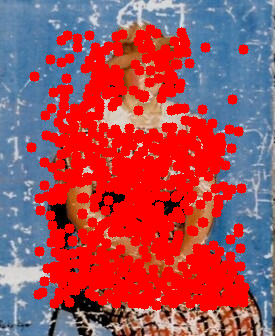

손상 정도: 97.87%


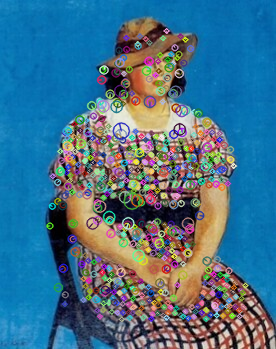

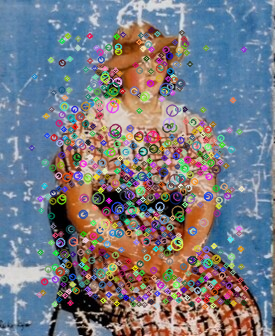

In [ ]:
original_path = '/content/drive/MyDrive/KeyPoint/images/origin.png'  # Update with your path
damaged_path = '/content/drive/MyDrive/KeyPoint/images/impairment.png'   # Update with your path

result, damage_ratio = detect_damage_akaze(original_path, damaged_path)

if result is not None and damage_ratio is not None:
    # 결과 표시
    cv2_imshow(result)
    print(f"손상 정도: {damage_ratio:.2%}")

    # 키포인트 시각화
    try:
        original = load_image(original_path)
        damaged = load_image(damaged_path)

        akaze = cv2.AKAZE_create()
        kp_original = akaze.detect(original, None)
        kp_damaged = akaze.detect(damaged, None)

        img_original_kp = draw_keypoints(original, kp_original)
        img_damaged_kp = draw_keypoints(damaged, kp_damaged)

        cv2_imshow(img_original_kp)
        cv2_imshow(img_damaged_kp)
    except Exception as e:
        print(f"키포인트 시각화 중 오류 발생: {e}")
else:
    print("손상 감지에 실패했습니다.")

In [2]:
original_path = '/content/drive/MyDrive/KeyPoint/images/apple.jpg'  # Update with your path
damaged_path = '/content/drive/MyDrive/KeyPoint/images/apple2.png'   # Update with your path

result, damage_ratio = detect_damage_akaze(original_path, damaged_path)

if result is not None and damage_ratio is not None:
    # 결과 표시
    cv2_imshow(result)
    print(f"손상 정도: {damage_ratio:.2%}")

    # 키포인트 시각화
    try:
        original = load_image(original_path)
        damaged = load_image(damaged_path)

        akaze = cv2.AKAZE_create()
        kp_original = akaze.detect(original, None)
        kp_damaged = akaze.detect(damaged, None)

        img_original_kp = draw_keypoints(original, kp_original)
        img_damaged_kp = draw_keypoints(damaged, kp_damaged)

        cv2_imshow(img_original_kp)
        cv2_imshow(img_damaged_kp)
    except Exception as e:
        print(f"키포인트 시각화 중 오류 발생: {e}")
else:
    print("손상 감지에 실패했습니다.")

Output hidden; open in https://colab.research.google.com to view.